In [1]:
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
import Orange
from sklearn import preprocessing
import pickle

In [2]:
df_static = pd.read_csv('Static_dataset.csv')

In [3]:
df_static.head(25)

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
5,16:29.5,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
6,26:58.3,23,3,0,20,0,3.568087,3,3,16,7.000000,pforzheim,pforzheim-bisons,20,1,0
7,57:29.2,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
8,27:59.6,14,3,0,12,0,2.514247,2,3,6,4.000000,face,reface,10,1,0
9,21:27.9,18,0,0,17,0,2.879113,1,2,14,8.500000,store,dellogliostore,15,0,0


# Data Imbalance or not

Text(0, 0.5, 'Frequency')

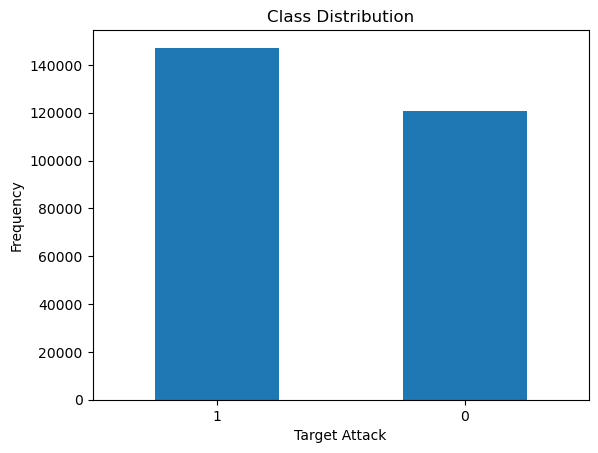

In [4]:
count_classes = pd.value_counts(df_static['Target Attack'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

# LABELS = ["Attack", "Non-Attack"]

plt.xticks(range(2))

plt.xlabel("Target Attack")

plt.ylabel("Frequency")

#### In the above class distribution of Target variable i.e. "Target Attack" is balanced,So we will not apply any sampling method to sampled the data

# EDA, Data Cleansing and Feature creation

In [5]:
df_static.shape

(268074, 16)

#### So here we can see the our df have 268074 rows and 16 columns

In [6]:
df_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

#### Apart from  timestamp, longest_word and sld all columns are in numerical format 

In [7]:
df_static.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


### Checking if any NULL values are there

In [8]:
df_static.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

<AxesSubplot:>

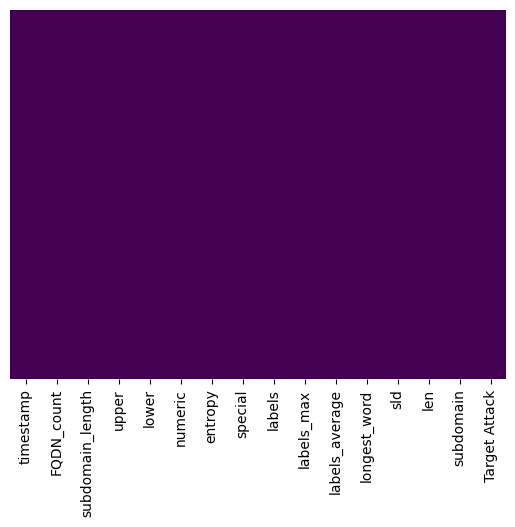

In [9]:
sns.heatmap(df_static.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### Here we can observe that all rows which have longest_word as NaN have TargetAttack 0,so we can remove 8 rows as it is very less,However we have already checkd the "Class Distribution" of 0 and 1 in Target Attck feature,as the portion of 0 and 1 is quite balance so it won't affect much if we remove 8 rows wit h 0 target

# BUT!!!!!!!!!!!!!!!!!!!!

### we can see one weird pattern in 'sld' and 'longest word' ,you can see that longest word is just a last digit of sld.for example if 'sld' is 192 then it 'longest word' for the the 192 is 2.which does not make any sense.so its very noisy.so we will drop 'longest word' and 'sld' column


In [10]:
df_static = df_static.drop(['longest_word','sld'],axis=1)

### Time stamp data doesnt matter much in the given task and dataset as DNS traffic attack and timestamp does not co-relate and doesnt dependent.

In [11]:
df_static = df_static.drop(['timestamp'],axis=1)

In [12]:
df_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        268074 non-null  int64  
 1   subdomain_length  268074 non-null  int64  
 2   upper             268074 non-null  int64  
 3   lower             268074 non-null  int64  
 4   numeric           268074 non-null  int64  
 5   entropy           268074 non-null  float64
 6   special           268074 non-null  int64  
 7   labels            268074 non-null  int64  
 8   labels_max        268074 non-null  int64  
 9   labels_average    268074 non-null  float64
 10  len               268074 non-null  int64  
 11  subdomain         268074 non-null  int64  
 12  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 26.6 MB


In [13]:
X = df_static[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'len', 'subdomain']]
y = df_static[['Target Attack']]

In [14]:
X

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
0,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1
3,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
268069,18,3,0,16,0,2.338623,2,3,10,5.333333,14,1
268070,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
268071,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
268072,16,0,0,14,0,3.249687,2,2,13,7.500000,14,0


# Data splitting 

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42)

X_train.shape, X_test.shape

((179609, 12), (88465, 12))

# Scaling

In [16]:
X_column_names = X_train.columns.values.tolist()

In [17]:
print(X_column_names)

['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'len', 'subdomain']


In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train[[column for column in X_column_names]])

MinMaxScaler()

In [20]:
X_train[[column for column in X_column_names]] = scaler.transform(X_train)

In [21]:
X_test[[column for column in X_column_names]] = scaler.transform(X_test)

# Feature Selection

## Feature Selection Using Mutual Information Gain

In [22]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.25644266, 0.22083544, 0.00209321, 0.23708399, 0.21511606,
       0.26261553, 0.26969772, 0.27600129, 0.22254981, 0.24280185,
       0.15974435, 0.15162721])

In [23]:
col=X_train.columns.tolist()

In [24]:
mutual_info = dict(zip(col, mutual_info))
mutual_info

{'FQDN_count': 0.25644266318655085,
 'subdomain_length': 0.22083544112159448,
 'upper': 0.0020932064427401365,
 'lower': 0.2370839929696389,
 'numeric': 0.2151160624712023,
 'entropy': 0.262615533625824,
 'special': 0.26969771642915163,
 'labels': 0.2760012874949169,
 'labels_max': 0.22254980728069418,
 'labels_average': 0.242801853693992,
 'len': 0.159744346541715,
 'subdomain': 0.15162720948257014}

<AxesSubplot:>

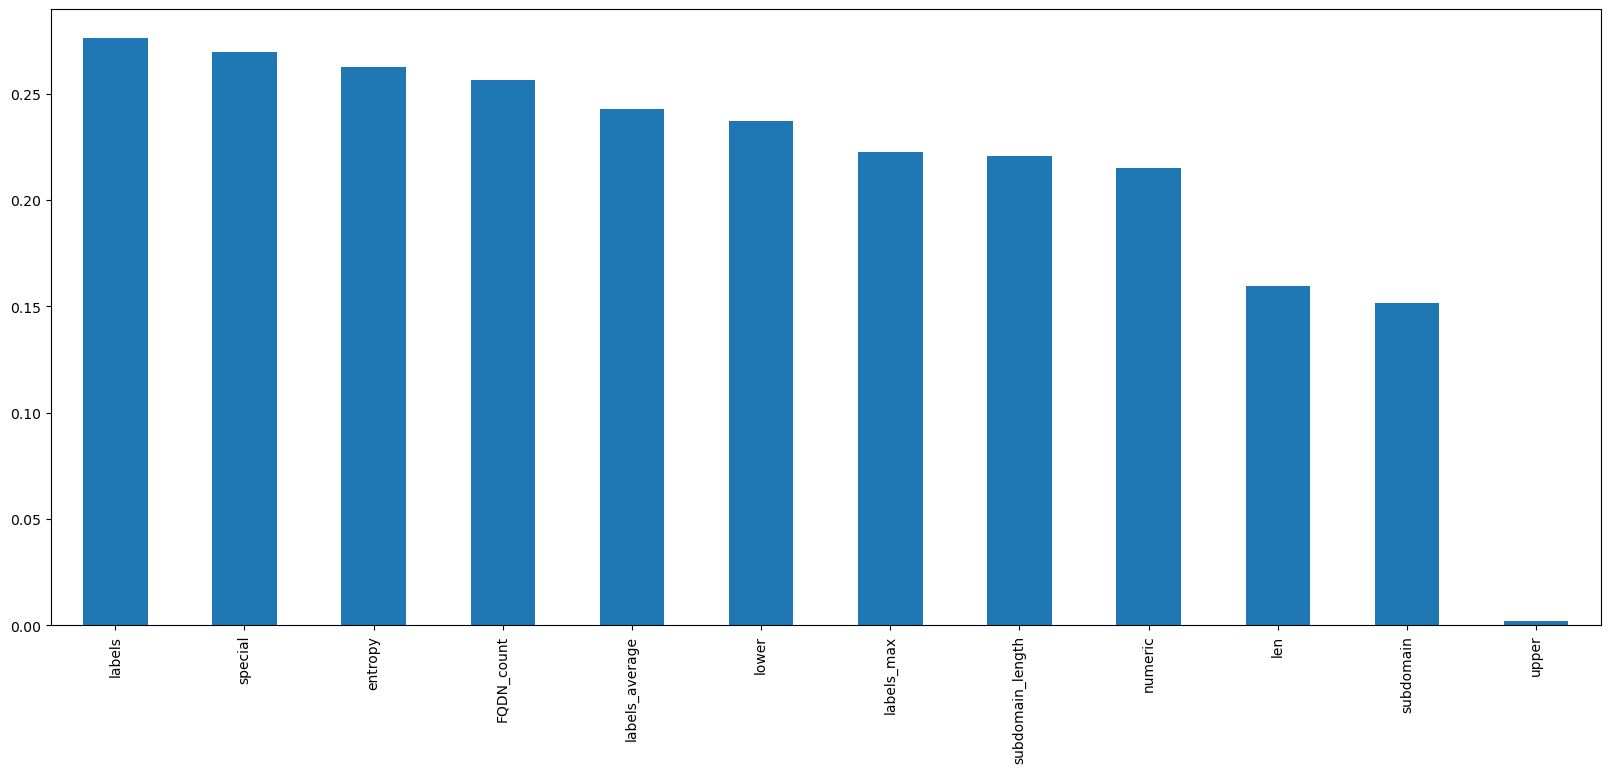

In [25]:
#let's plot the ordered mutual_info values per feature
bar_ind = pd.Series(mutual_info)
bar_ind.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [26]:
top_features = sorted(mutual_info, key=mutual_info.get, reverse=True)[:12]

In [27]:
top_features

['labels',
 'special',
 'entropy',
 'FQDN_count',
 'labels_average',
 'lower',
 'labels_max',
 'subdomain_length',
 'numeric',
 'len',
 'subdomain',
 'upper']

## Feature selection correlation features

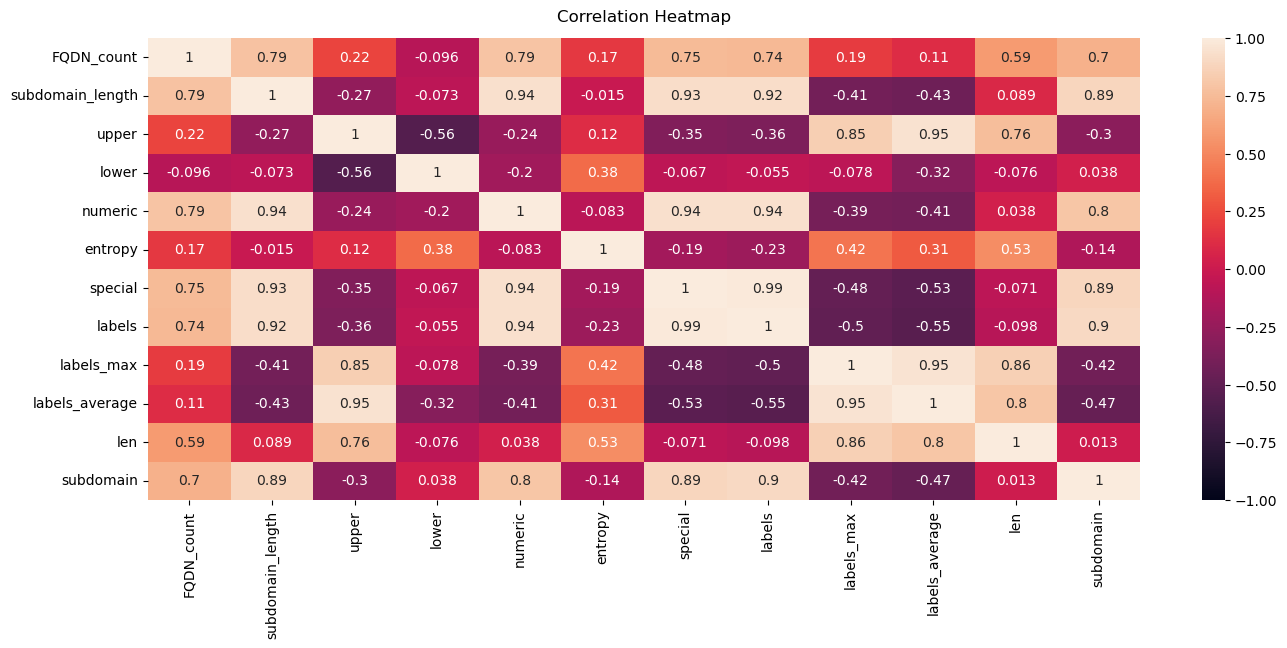

In [28]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [40]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [41]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

8

## Top correlated feature which correaltion is higher than 75%

In [42]:
corr_features

{'labels',
 'labels_average',
 'labels_max',
 'len',
 'numeric',
 'special',
 'subdomain',
 'subdomain_length'}

## So by seeing the results of correaltion matrix and Mutual information gain, we can see that there are 8 features wich correlation is higher than threshold(75%) and there are 8 features which mutual information gain and absoulute coefficent value is high out of 13 features.Thus,we will conisder other 8 feature in our model.

In [35]:
X_train = X_train.filter(['labels','labels_average','labels_max','len','numeric','special','subdomain','subdomain_length'])

In [36]:
X_test = X_test.filter(['labels','labels_average','labels_max','len','numeric','special','subdomain','subdomain_length'])

# GradientBoosting

In [37]:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.25, max_features=12, max_depth=4, random_state=42).fit(X_train, y_train)

In [38]:
gby_pred = gb.predict(X_test)

In [39]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,gby_pred)))
print('Precision Score : ' + str(precision_score(y_test,gby_pred)))
print('Recall Score : ' + str(recall_score(y_test,gby_pred)))
print('F1 Score : ' + str(f1_score(y_test,gby_pred)))

Accuracy Score : 0.8282710676538744
Precision Score : 0.7624350059512623
Recall Score : 0.9995277789184084
F1 Score : 0.8650295847474192


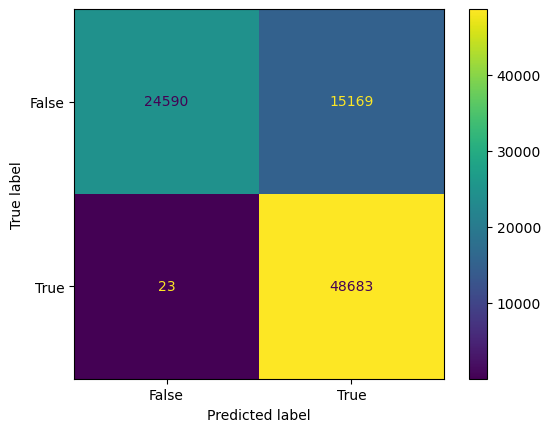

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test, gby_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# MLP(Multi-Layer-Perceptron)

In [41]:
params_onlykf_mlp = {
    'hidden_layer_sizes': [(50,50,50)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
    'random_state': [42]
}

In [42]:
mlp = GridSearchCV(MLPClassifier(max_iter=100), params_onlykf_mlp, n_jobs=-1).fit(X_train, y_train)

In [43]:
mlp.best_score_

0.8243740572365434

In [44]:
mlp_pred = mlp.predict(X_test)

In [45]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,mlp_pred)))
print('Precision Score : ' + str(precision_score(y_test,mlp_pred)))
print('Recall Score : ' + str(recall_score(y_test,mlp_pred)))
print('F1 Score : ' + str(f1_score(y_test,mlp_pred)))

Accuracy Score : 0.827773695811903
Precision Score : 0.7622300918236234
Recall Score : 0.99872705621484
F1 Score : 0.8645977746969534


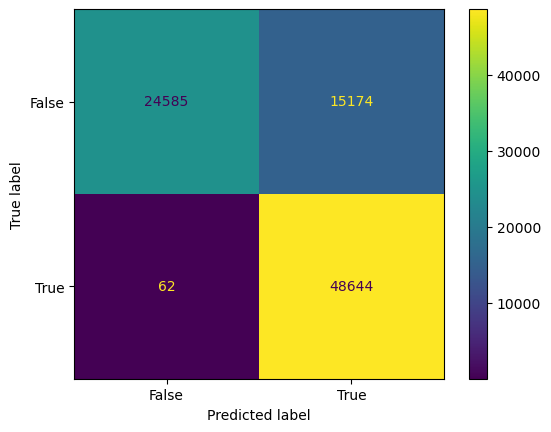

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, mlp_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [47]:
pickle.dump(gb, open('gb_model.pkl', 'wb'))

In [49]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))